In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
from vega_datasets import data

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Bringing in the data to work with
df = pd.read_csv('merged_df.csv')

In [3]:
df.head()

,Unnamed: 0,sale_amount,sale_date,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode
0,0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [4]:
df.dtypes

Unnamed: 0         int64
sale_amount      float64
sale_date         object
item_brand        object
item_name         object
item_price       float64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
dtype: object

<AxesSubplot:xlabel='sale_amount', ylabel='item_price'>

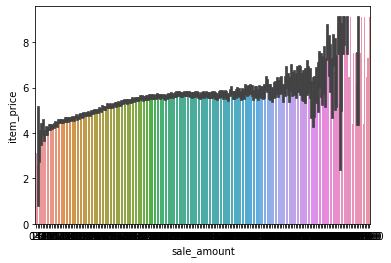

In [5]:
sns.barplot(data = df, x = df.sale_amount, y= df.item_price)

In [5]:
# converting the sale date to dt form
df.sale_date = pd.to_datetime(df.sale_date)

In [8]:
df.sale_date = pd.to_datetime(df.sale_date.str.split(' 00:00:00 GMT').str[0].str.split(', ').str[1],format='%d %b %Y')

In [6]:
df.head()

,Unnamed: 0,sale_amount,sale_date,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode
0,0,13.0,2013-01-01 00:00:00+00:00,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,2013-01-02 00:00:00+00:00,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,14.0,2013-01-03 00:00:00+00:00,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,13.0,2013-01-04 00:00:00+00:00,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,10.0,2013-01-05 00:00:00+00:00,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [7]:
#checking to see if it worked
df.dtypes

Unnamed: 0                     int64
sale_amount                  float64
sale_date        datetime64[ns, UTC]
item_brand                    object
item_name                     object
item_price                   float64
store_address                 object
store_city                    object
store_state                   object
store_zipcode                  int64
dtype: object

In [8]:
# Setting the index to be the sale_date
df = df.set_index('sale_date').sort_index()

In [9]:

df['day_of_week'] = df.index.strftime('%A')

df['month'] = df.index.strftime('%B')

In [10]:
df.head()

,Unnamed: 0,sale_amount,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode,day_of_week,month
sale_date,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13.0,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Tuesday,January
2013-01-01 00:00:00+00:00,211816,26.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,January
2013-01-01 00:00:00+00:00,832656,27.0,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,January
2013-01-01 00:00:00+00:00,213642,54.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,San Antonio,TX,78232,Tuesday,January
2013-01-01 00:00:00+00:00,215468,35.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,San Antonio,TX,78221,Tuesday,January


In [11]:
df.day_of_week.value_counts()

Tuesday      130500
Wednesday    130500
Thursday     130500
Friday       130500
Saturday     130500
Sunday       130500
Monday       130000
Name: day_of_week, dtype: int64

In [12]:
df.columns

Index(['Unnamed: 0', 'sale_amount', 'item_brand', 'item_name', 'item_price',
       'store_address', 'store_city', 'store_state', 'store_zipcode',
       'day_of_week', 'month'],
      dtype='object')

In [13]:
df['sales_total'] = df.sale_amount * df.item_price

In [15]:
def set_date():
    df.sale_date = pd.to_datetime(df.sale_date)

    df = df.set_index('sale_date').sort_index()

    df['day_of_week'] = df.index.strftime('%A')

    df['month'] = df.index.strftime('%B')

    df['sales_total'] = df.sale_amount * df.item_price

    return df

# power data

In [3]:
power = pd.read_csv('power.csv')

In [20]:
power.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [21]:
power.dtypes

Unnamed: 0       int64
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [22]:
power.Date = pd.to_datetime(power.Date)

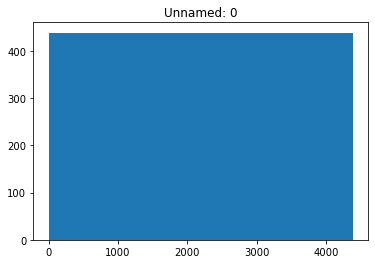

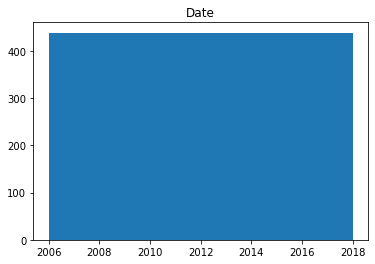

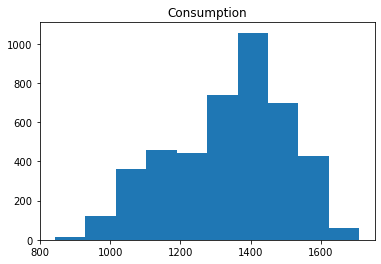

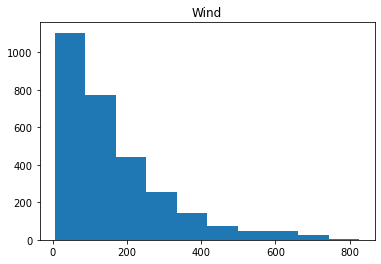

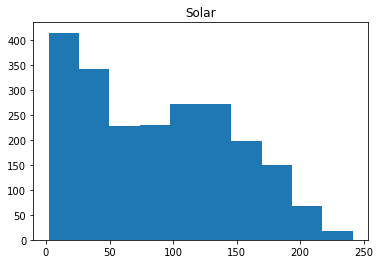

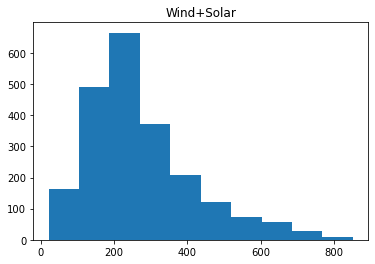

In [20]:
for col in power.columns:
    plt.hist(power[col])
    plt.title(col)
    plt.show()

In [23]:
power = power.set_index('Date').sort_index()

In [24]:
power['month'] = power.index.month_name

In [25]:
power['year'] = power.index.year

In [26]:
power.head()

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,,
2006-01-01,0,1069.184,NaN,NaN,NaN,<bound method _inherit_from_data.<locals>.meth...,2006
2006-01-02,1,1380.521,NaN,NaN,NaN,<bound method _inherit_from_data.<locals>.meth...,2006
2006-01-03,2,1442.533,NaN,NaN,NaN,<bound method _inherit_from_data.<locals>.meth...,2006
2006-01-04,3,1457.217,NaN,NaN,NaN,<bound method _inherit_from_data.<locals>.meth...,2006
2006-01-05,4,1477.131,NaN,NaN,NaN,<bound method _inherit_from_data.<locals>.meth...,2006


In [24]:
power.columns

Index(['Unnamed: 0', 'Consumption', 'Wind', 'Solar', 'Wind+Solar', 'month',
       'year'],
      dtype='object')

In [25]:
power.isnull().sum()

Unnamed: 0        0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [26]:
power = power.fillna('0')

In [7]:
def power_date(df):
    df.Date = pd.to_datetime(df.Date)

    df = df.set_index('Date').sort_index()

    df['day_of_week'] = df.index.strftime('%A')

    df['month'] = df.index.strftime('%B')

    df = df.fillna('0')

    df = df.drop(columns='Unnamed: 0')

    return df

In [8]:
power = power_date(power)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [6]:
power.head()

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,day_of_week,month
Date,,,,,,,
2006-01-01,0,1069.184,0,0,0,Sunday,January
2006-01-02,1,1380.521,0,0,0,Monday,January
2006-01-03,2,1442.533,0,0,0,Tuesday,January
2006-01-04,3,1457.217,0,0,0,Wednesday,January
2006-01-05,4,1477.131,0,0,0,Thursday,January
